In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and assembly

In [2]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID'] 
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]
print(spectra.shape)
spectra.head()

(698, 293)


,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


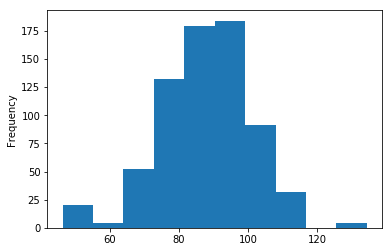

In [3]:
spectra['target'].plot.hist()

In [4]:
#spectra = spectra[spectra['target'] < 100]
spectra.shape

(698, 293)

# Dataset clean ?

In [5]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,...,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,87.867001,88.361032,35.075930,34.089405,33.118207,32.248728,31.512126,30.961026,30.527884,30.184520,...,0.642378,0.717119,0.779950,0.821864,0.881985,0.945085,1.006667,1.069775,1.134070,1.199629
std,13.327779,51.000422,2.030035,2.060834,2.089150,2.111065,2.129829,2.145836,2.150767,2.153461,...,0.686442,0.693758,0.699668,0.704813,0.711064,0.717485,0.724458,0.731790,0.738503,0.745828
min,46.333333,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.764682,-1.726724,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741
25%,80.000000,44.250000,34.081783,33.112638,32.129796,31.271699,30.559600,30.006750,29.585270,29.244950,...,0.238126,0.316725,0.373221,0.403003,0.462925,0.522936,0.587332,0.652647,0.715998,0.776902
50%,88.000000,88.000000,35.383537,34.404322,33.446087,32.584858,31.861850,31.307280,30.874285,30.531601,...,0.632675,0.710483,0.777476,0.820467,0.884216,0.946825,1.012075,1.078114,1.142786,1.210467
75%,96.000000,132.000000,36.358374,35.383751,34.438153,33.573155,32.844104,32.324157,31.889494,31.551481,...,1.084671,1.158659,1.218695,1.270178,1.330560,1.392627,1.460363,1.528732,1.594301,1.659343
max,134.333333,177.000000,42.143303,41.016056,39.927353,38.940678,38.071739,37.357346,36.864861,36.467106,...,2.929408,2.975907,3.031236,3.091215,3.146902,3.201092,3.255369,3.311751,3.375964,3.431573


In [6]:
spectra.isnull().sum().sum()

0

In [7]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 293 entries, target to 1530
dtypes: float64(292), int64(1)
memory usage: 1.6 MB


# Possible outliers cleaning

In [8]:
spectra = spectra[spectra['target'] >  70]
spectra = spectra[spectra['target'] < 105]
spectra.shape

(591, 293)

# Outlier cleaning within sample ID

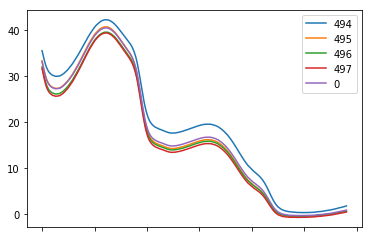

In [9]:
subset = spectra[spectra['sampleID'] == 125]
subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

In [10]:
subsetcol = ['sampleID']
subsetcol.extend([str(x) for x in range(950, 1530+1,2)])
df = spectra[subsetcol]
df.head()

,sampleID,950,952,954,956,958,960,962,964,966,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,31.536673,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,31.159092,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,30.235334,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,30.029732,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,1,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,31.041756,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


In [11]:
cols = [str(x) for x in range(950, 1530+1,2)]
result = (df[cols]- df.groupby('sampleID').transform('mean').values) > df.groupby('sampleID').transform('std')*1.45
spectra[result.sum(axis=1) == 0].shape

(525, 293)

In [12]:
spectra = spectra[result.sum(axis=1) == 0]

In [13]:
spectra.shape

(525, 293)

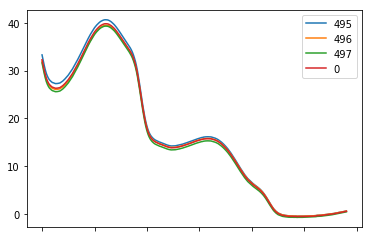

In [14]:
subset = spectra[spectra['sampleID'] == 125]
subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

# Target description

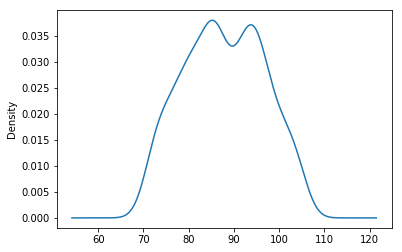

In [15]:
spectra['target'].plot.density()

In [16]:
# The closer to 0, the better
spectra['target'].skew()


0.0013473014665754187

In [17]:
from scipy.special import inv_boxcox
from scipy import stats
spectra['targetBC'], lmbda = stats.boxcox(spectra['target'])

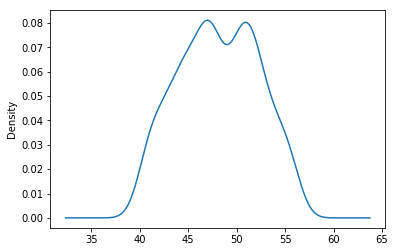

-0.02622329523228467

In [18]:
spectra['targetBC'].plot.density()
plt.show()
spectra['targetBC'].skew()

# SampleID  aggregation

In [19]:
spectra[['target']].describe()

,target
count,525.000000
mean,87.808571
std,8.806655
min,71.000000
25%,80.666667
50%,87.000000
75%,94.666667
max,104.666667


OrderedDict([(0.0, 71.0), (0.25, 80.66666666666667), (0.5, 87.0), (0.75, 94.66666666666669), (1.0, 104.66666666666669)])


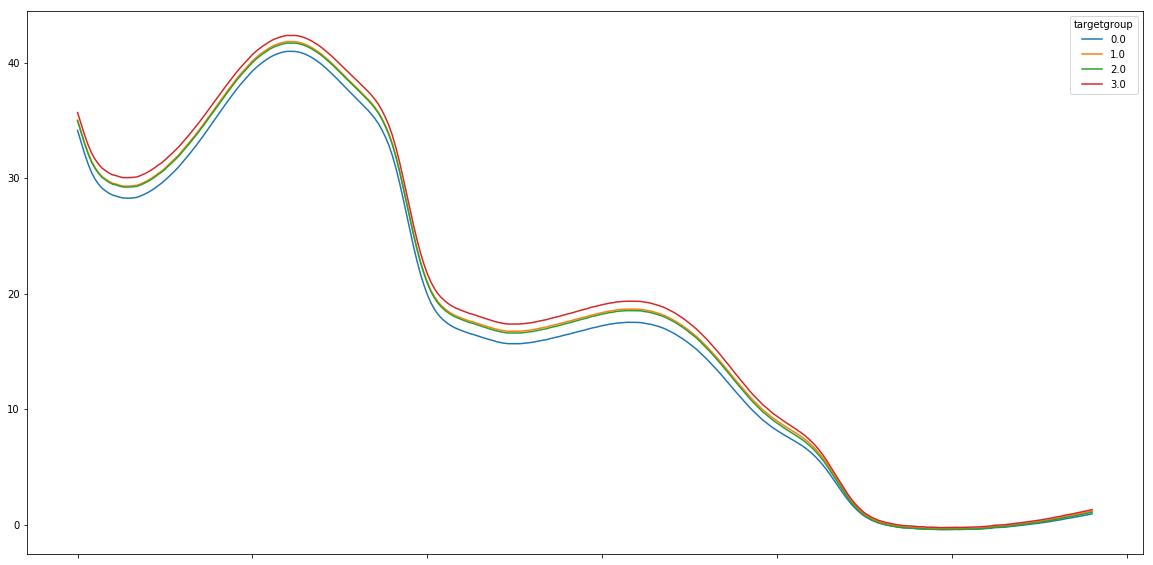

In [20]:
import collections
groupnumber = 4 +1
# defines quant group
quants = spectra['target'].quantile(np.linspace(0, 1, groupnumber)).to_dict()
print(collections.OrderedDict(sorted(quants.items())))
def quantplacement(entry):
    index = -1
    for key,value in collections.OrderedDict(sorted(quants.items())).items():
        if entry < value:
            return index
        index += 1
    #return index
        
spectra['targetgroup']=spectra['target'].apply(quantplacement)
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').mean().T.plot(figsize=(20,10))
plt.show()


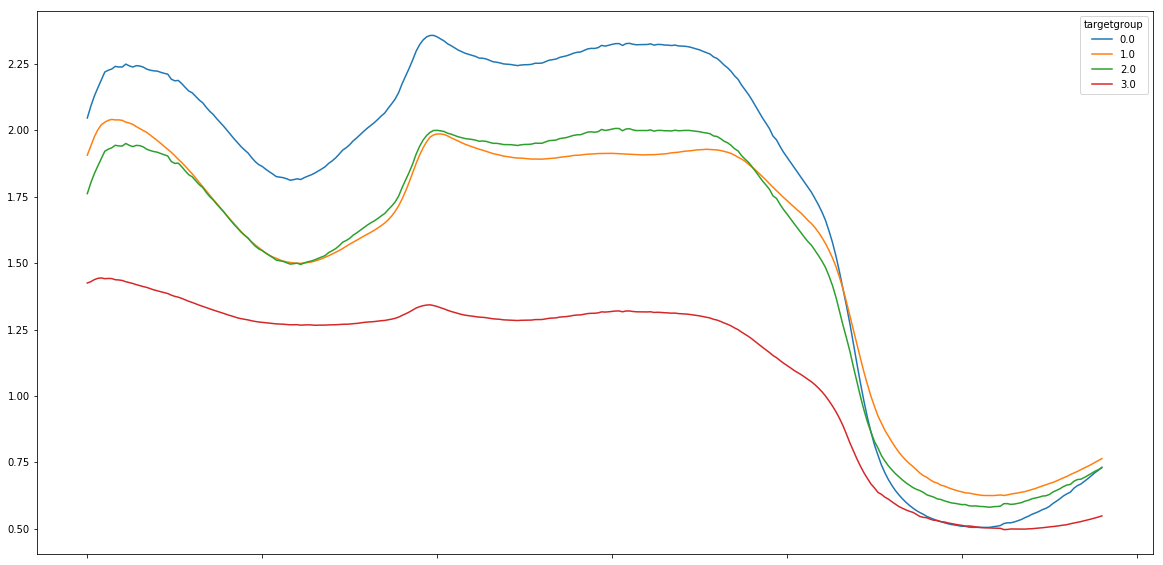

In [21]:
#Standard deviation
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').std().T.plot(figsize=(20,10))

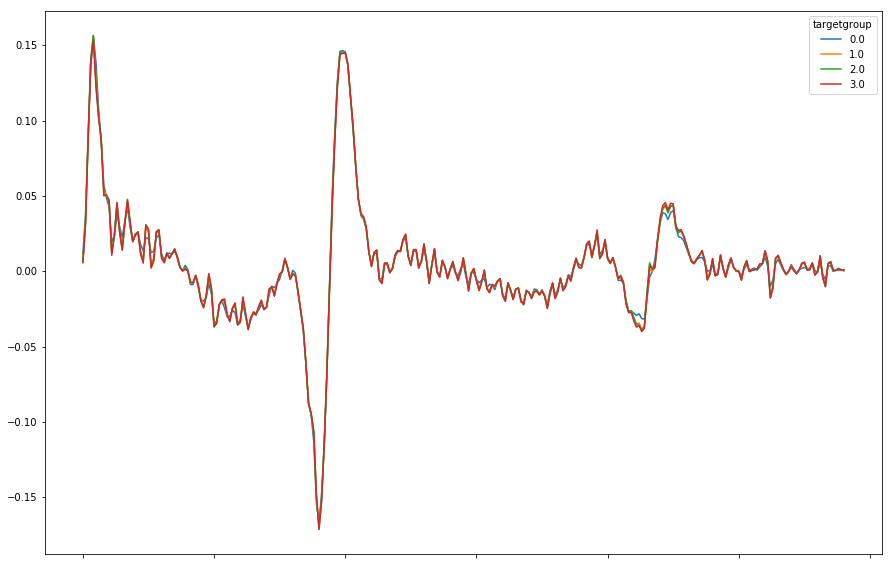

In [22]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()

def gradient(entry):
    #print(entry)
    return np.gradient(np.gradient(entry))

subset = spectra[[str(x) for x in range(950, 1530+1,2)]].apply(gradient, axis=1)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))

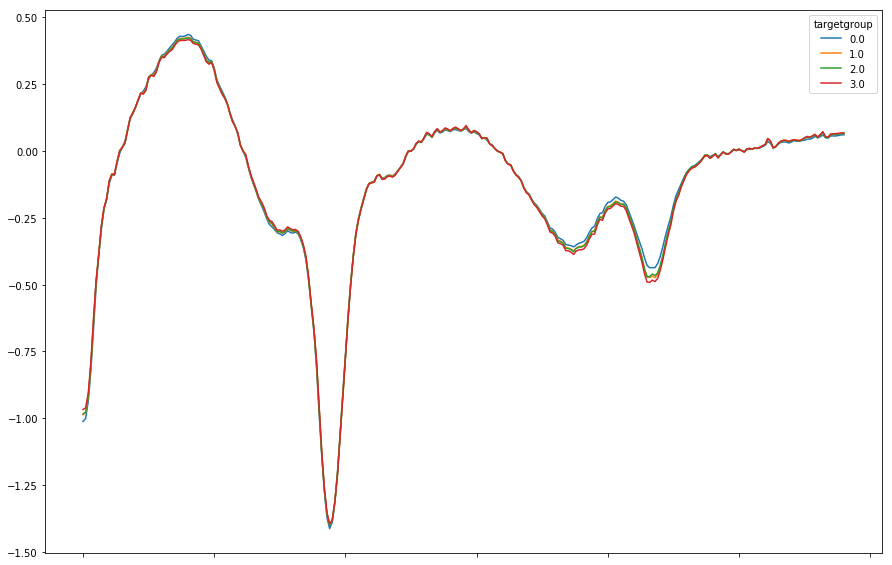

In [23]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()

def gradient(entry):
    #print(entry)
    return np.gradient(entry)

subset = spectra[[str(x) for x in range(950, 1530+1,2)]].apply(gradient, axis=1)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))

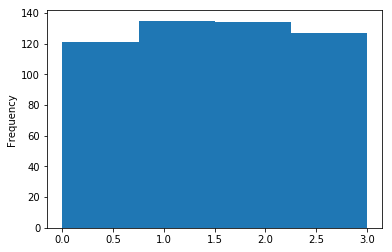

In [24]:
spectra['targetgroup'].plot.hist(bins = groupnumber-1)

In [25]:
spectra['target'].value_counts().idxmax()

83.66666666666667

In [26]:
df = spectra[spectra['target'] == 92]
df.shape

(9, 295)

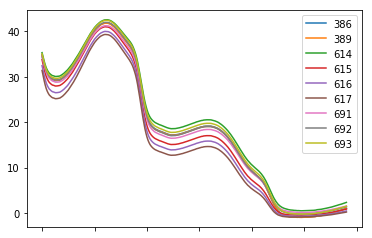

In [27]:
df[[str(x) for x in range(950, 1530+1,2)]].T.plot()

In [28]:
df['sampleID']

386     98
389     98
614    156
615    156
616    156
617    156
691    176
692    176
693    176
Name: sampleID, dtype: int64

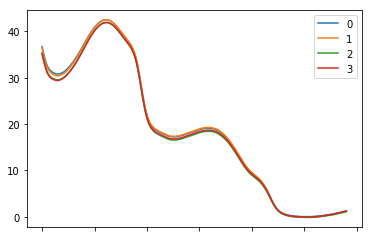

In [29]:
subset = spectra[spectra['sampleID'] == 0]
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

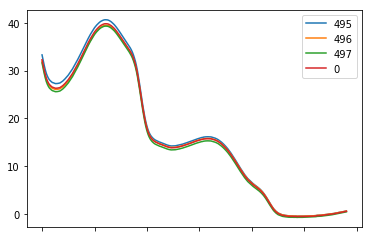

In [30]:
subset = spectra[spectra['sampleID'] == 125]
subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

In [31]:
subset

,target,sampleID,950,952,954,956,958,960,962,964,...,1516,1518,1520,1522,1524,1526,1528,1530,targetBC,targetgroup
495,81.666667,125.0,33.286423,32.221680,31.171883,30.244602,29.463644,28.885019,28.433910,28.080521,...,0.372864,0.395162,0.438904,0.487497,0.532387,0.577512,0.622316,0.671066,45.272914,1.0
496,81.666667,125.0,31.953867,30.907152,29.874184,28.967979,28.205471,27.639858,27.196039,26.848068,...,0.375828,0.398887,0.442004,0.490820,0.535841,0.580593,0.625828,0.667300,45.272914,1.0
497,81.666667,125.0,31.612619,30.532179,29.469980,28.536695,27.753347,27.176903,26.723646,26.368385,...,0.184700,0.210626,0.255134,0.305136,0.352943,0.400680,0.448569,0.492650,45.272914,1.0
0,81.666667,125.0,32.284303,31.220337,30.172016,29.249759,28.474154,27.900593,27.451199,27.098991,...,0.311131,0.334892,0.378680,0.427818,0.473724,0.519595,0.565571,0.610339,45.272914,1.0


# Regression

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union

## Folds definition

In [33]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

## Savgol filter

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [34]:
from scipy.signal import savgol_filter

class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, params={}, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.params = params
        self.columns = columns
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X[self.columns]
        return df.apply(lambda x:savgol_filter(x, **self.params), axis=1)
    
savgol = Savgol(params={'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(525, 291)

In [35]:
class Gradientplus(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X[self.columns]
        return df.apply(lambda x:np.gradient(x), axis=1)
    
gradient = Gradientplus()
savgol.fit_transform(spectra).shape

(525, 291)

In [36]:
class Gradient2plus(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X[self.columns]
        return df.apply(lambda x:np.gradient(np.gradient(x)), axis=1)
    
gradient2 = Gradient2plus()
gradient2.fit_transform(spectra).shape

(525, 291)

In [37]:
#df = pd.DataFrame([[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9]])
#gradient.fit_transform(df)

## Column selection

In [38]:
class Colselect(BaseEstimator, TransformerMixin):
    def __init__(self, columns=[]):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.columns]

#colselect = Colselect(['sampleID'])
#colselect.fit_transform(spectra).shape

## Blocs creation

In [39]:
colselect = Colselect(['sampleID'])
colselect.fit_transform(spectra).shape

(525, 1)

In [40]:
savgol = Savgol({'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(525, 291)

In [41]:
gradient = Gradientplus()
gradient.fit_transform(spectra).shape

(525, 291)

In [42]:
gradient2 = Gradient2plus()
gradient.fit_transform(spectra).shape

(525, 291)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
from sklearn.decomposition import PCA
pca = PCA()

# Tree construction

In [45]:
lrpipelist1 = [('scaler', scaler), ('pca', pca)] #
pipe1 = Pipeline(lrpipelist1)
#Xtrans = pipe1.fit_transform(spectra)#.shape

In [46]:
from sklearn.pipeline import make_union
union1 = make_union(pipe1, gradient, gradient2) 
#union1.fit_transform(spectra)

In [47]:
lrpipelist2 = [('savgol', savgol), ('union1', union1)] #
pipe2 = Pipeline(lrpipelist2)

In [48]:
union3 = make_union(pipe2, colselect) 

In [49]:
union3.fit_transform(spectra).shape

(525, 874)

In [50]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state=0, max_iter=10000)

In [51]:
lrpipelist4 = [('union3', union3), ('elnet', elnet)] #
pipe4 = Pipeline(lrpipelist2)

In [52]:
pipe4.fit(spectra, spectra['target'])

Pipeline(memory=None,
     steps=[('savgol', Savgol(columns=['950', '952', '954', '956', '958', '960', '962', '964', '966', '968', '970', '972', '974', '976', '978', '980', '982', '984', '986', '988', '990', '992', '994', '996', '998', '1000', '1002', '1004', '1006', '1008', '1010', '1012', '1014', '1016', '1018', '1020', '10...516', '1518', '1520', '1522', '1524', '1526', '1528', '1530']))],
       transformer_weights=None))])

# PCA visualisation

In [66]:

Xtrans = union3.fit_transform(spectra)
Xtrans.shape

(525, 874)

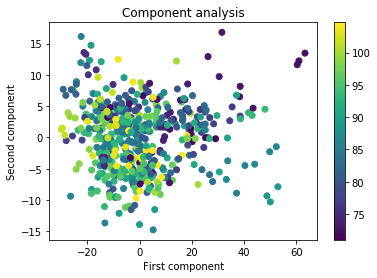

In [67]:
plt.scatter(Xtrans[:, 0], Xtrans[:, 1], c=spectra['target'])
# Axis
#plt.plot([-40, 40], [0, 0], color='black', ls='--')
#plt.plot([0, 0], [-14, 14], color='black', ls='--')
# Title
plt.title('Component analysis')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.colorbar()
plt.show()

# Tsne visualisation

In [68]:
from sklearn.manifold import TSNE

Xtrans = union3.fit_transform(spectra)
Xtrans.shape

(525, 874)

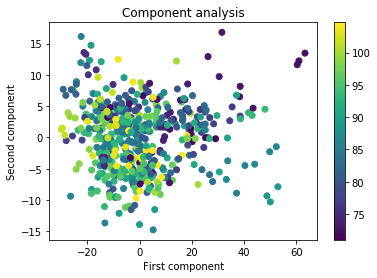

In [69]:
plt.scatter(Xtrans[:, 0], Xtrans[:, 1], c=spectra['target'])
# Axis
#plt.plot([-40, 40], [0, 0], color='black', ls='--')
#plt.plot([0, 0], [-14, 14], color='black', ls='--')
# Title
plt.title('Component analysis')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.colorbar()
plt.show()

### HyperOpt

In [54]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [58]:
counter = 0
bestscore = 1e20

Xtrans = union3.fit_transform(spectra)

def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
    

    
    #print(hyperparams)
    
    elnet = ElasticNet(**hyperparams)

    
    preds = cross_val_predict(elnet, Xtrans,spectra['targetBC'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , inv_boxcox(preds, lmbda))
    
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter % 20 == 0:
        print("{} - RMSECV {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, hyperparams))
    return score

space = {
    'alpha': hp.loguniform('alpha', -6, 2),
    'l1_ratio': hp.loguniform('l1_ratio',-3, 0),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=800)

1 - RMSECV 8.266714898230697 - {'alpha': 5.865017588897156, 'l1_ratio': 0.19610535736460577, 'random_state': 0, 'max_iter': 10000}
4 - RMSECV 8.152064358020128 - {'alpha': 1.9978339730723198, 'l1_ratio': 0.18835105668739746, 'random_state': 0, 'max_iter': 10000}
5 - RMSECV 7.35611112675386 - {'alpha': 0.11055827417449522, 'l1_ratio': 0.20037663217495297, 'random_state': 0, 'max_iter': 10000}
8 - RMSECV 7.1215099552585786 - {'alpha': 0.039951442357113315, 'l1_ratio': 0.15029795769686072, 'random_state': 0, 'max_iter': 10000}
9 - RMSECV 5.953175095901046 - {'alpha': 0.002567413048318372, 'l1_ratio': 0.17753143227134013, 'random_state': 0, 'max_iter': 10000}
14 - RMSECV 5.950935206367686 - {'alpha': 0.0027179620928138885, 'l1_ratio': 0.23615543599313418, 'random_state': 0, 'max_iter': 10000}
16 - RMSECV 5.706652769503178 - {'alpha': 0.0026827705423508584, 'l1_ratio': 0.6329170142402462, 'random_state': 0, 'max_iter': 10000}
20 - RMSECV 5.9278529887786915
23 - RMSECV 5.274635263826287 - {'

In [309]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
params# = {'alpha': 0.0025463439947105786, 'l1_ratio': 0.9987487227563826, 'max_iter': 10000, 'random_state': 0}

{'alpha': 0.0028018098844306634,
 'l1_ratio': 0.32290255581895866,
 'max_iter': 10000,
 'random_state': 0}

In [310]:
#params = {'alpha': 0.0025463439947105786, 'l1_ratio': 0.9987487227563826, 'max_iter': 10000, 'random_state': 0}

In [311]:
elnet = ElasticNet(**params)
pipe = [('savgol', savgol), ('union', union), ('scaler', scaler), ('pca', PCA(n_components=350)), ('elnet', elnet)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

15.97287586397084

In [312]:
mean_squared_error(ypred, spectra['target'])**.5

3.9966080448263677

## Coeff verification

In [55]:
regpip.fit(spectra,spectra['targetBC'])
regpip.named_steps['elnet'].coef_[:20]

array([-0.05563859,  0.11985981, -0.09147214,  0.01731446, -0.27545749,
        0.2521559 ,  0.0828891 , -0.18151953,  0.1737915 , -0.54239905,
       -1.67318951,  0.89645126, -1.13305228, -0.21690683,  0.6538953 ,
       -0.80220923, -0.01798411,  0.21553981,  0.00952608, -0.14782165])

In [56]:
regpip.named_steps['elnet'].coef_.max()

1.734272423026576

In [57]:
regpip.named_steps['elnet'].coef_.min()

-2.2489345196271273

## Score accuracy

In [58]:
df = pd.DataFrame({'target':spectra['target'], 'pred':ypred, 'targetgroup':spectra['targetgroup'], 'sampleID':spectra['sampleID'],}) #
df.head()

,pred,sampleID,target,targetgroup
0,90.404810,0,94.333333,2
1,94.233365,0,94.333333,2
2,97.205220,0,94.333333,2
3,95.070077,0,94.333333,2
5,74.142137,1,76.333333,0


In [59]:
df['delta'] = df['target'] - df['pred']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,pred,sampleID,target,targetgroup,delta,deltaabs
0,90.404810,0,94.333333,2,3.928523,3.928523
1,94.233365,0,94.333333,2,0.099968,0.099968
2,97.205220,0,94.333333,2,-2.871887,2.871887
3,95.070077,0,94.333333,2,-0.736744,0.736744
5,74.142137,1,76.333333,0,2.191196,2.191196


In [60]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 507
prediction +/- 1.0 : percent 18.34 %
prediction +/- 2.0 : percent 36.09 %
prediction +/- 3.0 : percent 52.66 %
prediction +/- 4.0 : percent 66.47 %
prediction +/- 6.0 : percent 86.00 %
prediction +/- 8.0 : percent 96.25 %
prediction +/- 10.0 : percent 99.21 %


In [61]:
df[['delta']].describe()

,delta
count,507.000000
mean,0.042907
std,4.021307
min,-11.793803
25%,-2.882552
50%,-0.110448
75%,2.683477
max,10.393454


In [62]:
import seaborn as sns

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


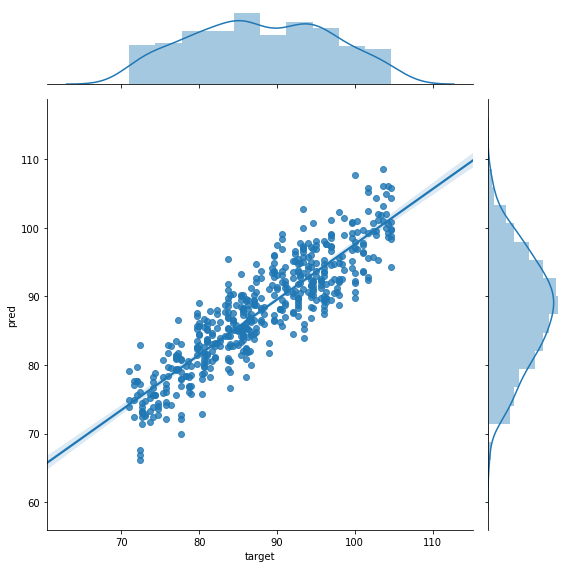

In [63]:

sns.jointplot(x='target', y='pred', data=df, kind='reg', size=8, stat_func=None)
plt.show()

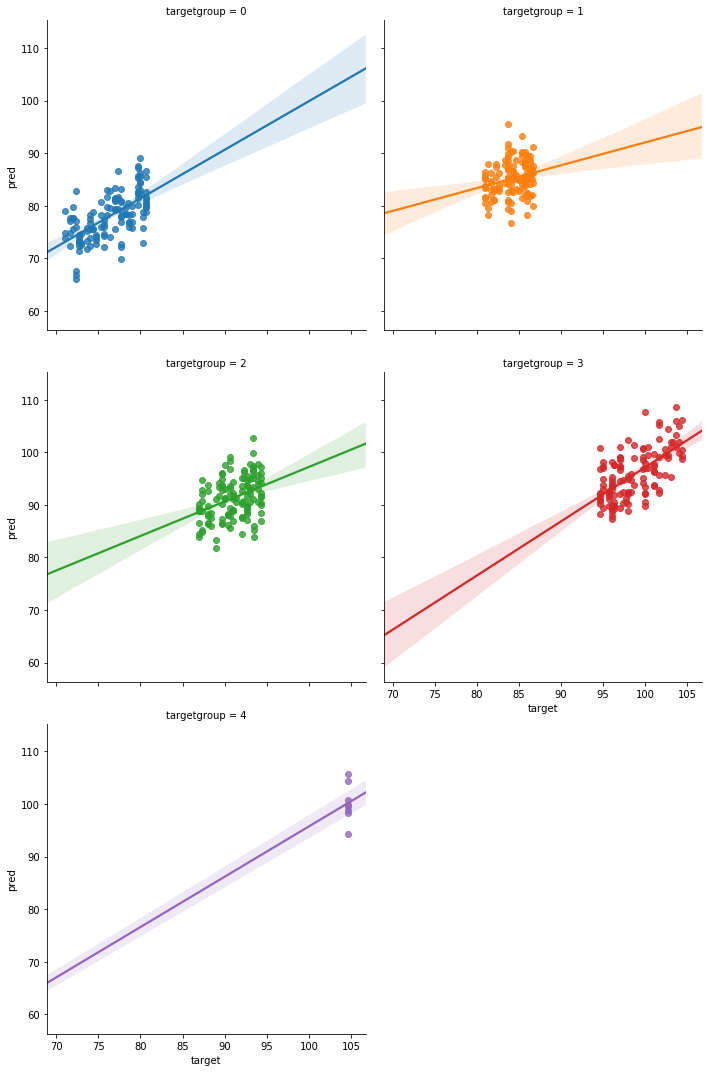

In [64]:
sns.lmplot(x='target',
           y='pred',
           col='targetgroup',
           hue='targetgroup',
           data=df,
           aspect=1,
           col_wrap=2,
           size=5,
           legend=True)
plt.show()

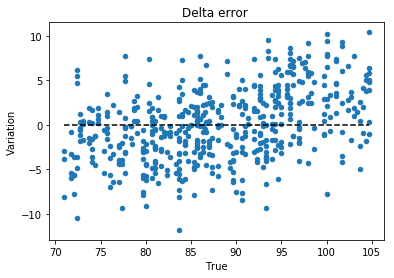

,delta
count,507.000000
mean,0.042907
std,4.021307
min,-11.793803
25%,-2.882552
50%,-0.110448
75%,2.683477
max,10.393454


In [65]:

df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error ')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()

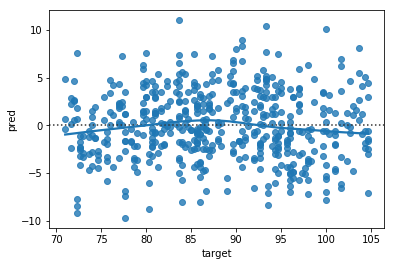

In [66]:
sns.residplot(x='target', y='pred', data=df, lowess=True)

In [60]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge()

In [64]:
counter = 0
bestscore = 1e20

Xtrans = union3.fit_transform(spectra)



def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'gamma': params['gamma'],
        'alpha': params['alpha'],
        'kernel': params['kernel'],
        'degree': params['degree'],
        #'max_iter':10000,
        }
    
    #print(hyperparams)
    
    krr = KernelRidge(**hyperparams)
  
    
    #preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf, n_jobs=-2)
    #score = mean_squared_error(spectra['target'] , inv_boxcox(preds, lmbda))
    
    preds = cross_val_predict(krr, Xtrans, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    
    if counter % 10 == 0:
        print("{} - RMSE {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, hyperparams))
    return score

space = {
    'gamma': hp.loguniform('gamma', -3, 0),
    'alpha': hp.loguniform('alpha',-2, 0),
    'kernel':hp.choice('kernel', ['poly']), #
    'degree':hp.choice('degree', [2,3]),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=800)

1 - RMSECV 17.478080408156984 - {'gamma': 0.0637194772051087, 'alpha': 0.26222422476324697, 'kernel': 'poly', 'degree': 3}
2 - RMSECV 11.573176612129066 - {'gamma': 0.14737797740222647, 'alpha': 0.20348360907479812, 'kernel': 'poly', 'degree': 3}
4 - RMSECV 4.00105040982622 - {'gamma': 0.5847305296615216, 'alpha': 0.5507922027398368, 'kernel': 'poly', 'degree': 2}
10 - RMSE 7.136076444190152
14 - RMSECV 3.8617128359258124 - {'gamma': 0.3985822986791904, 'alpha': 0.26844294807723307, 'kernel': 'poly', 'degree': 2}
16 - RMSECV 3.831953701780336 - {'gamma': 0.6301533728893824, 'alpha': 0.968874206464727, 'kernel': 'poly', 'degree': 2}
20 - RMSE 3.849237914862777
24 - RMSECV 3.7965885055330766 - {'gamma': 0.23647820594329538, 'alpha': 0.42727673517156245, 'kernel': 'poly', 'degree': 2}
30 - RMSE 4.0913937917199625
40 - RMSE 4.0826943549969315
50 - RMSE 4.443425202987064
60 - RMSE 4.018797379142869
70 - RMSE 3.961996942721302
80 - RMSE 4.096206126336339
90 - RMSE 3.8470175250791727
93 - RMS

In [142]:
params = {
        'alpha': best['alpha'],
        'gamma': best['gamma'],
        'kernel': 'poly',
        'degree':2,
        }
params

{'alpha': 0.11239390187344853,
 'degree': 2,
 'gamma': 0.04988742053201945,
 'kernel': 'poly'}

In [143]:
krr = KernelRidge(**params)
#pipe = [('savgol', savgol), ('union', union), ('scaler', scaler), ('pca', pca), ('krr', krr)]
pipe = [('savgol', savgol), ('union', union), ('scaler', scaler), ('union2', union2), ('krr', krr)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, spectra, spectra['target'], cv=kf)
mean_squared_error(spectra['target'], preds)**.5

36.469857496157644

In [144]:
df = pd.DataFrame({'target':spectra['target'], 'pred':preds, 'targetgroup':spectra['targetgroup'], 'sampleID':spectra['sampleID'],})
df['delta'] = df['pred'] - df['target']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,pred,sampleID,target,targetgroup,delta,deltaabs
0,106.742340,0,94.333333,2,12.409007,12.409007
1,103.259305,0,94.333333,2,8.925971,8.925971
2,94.323473,0,94.333333,2,-0.009861,0.009861
3,101.344026,0,94.333333,2,7.010692,7.010692
5,84.484133,1,76.333333,0,8.150799,8.150799


/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


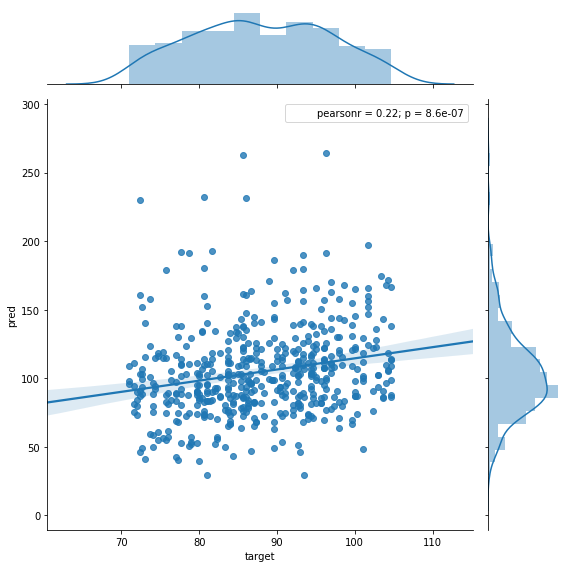

In [145]:
import seaborn as sns
sns.jointplot(x='target', y='pred', data=df, kind='reg', size=8)
plt.show()

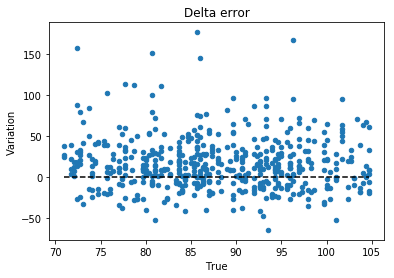

,delta
count,507.000000
mean,16.797178
std,32.403338
min,-64.005513
25%,-4.746792
50%,11.994106
75%,31.978288
max,176.814753


In [146]:
df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()

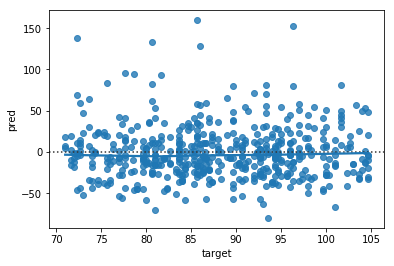

In [147]:
sns.residplot(x='target', y='pred', data=df, lowess=True)

In [148]:
df['delta'].max()

176.8147526316277

In [149]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 507
prediction +/- 1.0 : percent 02.56 %
prediction +/- 2.0 : percent 04.93 %
prediction +/- 3.0 : percent 07.89 %
prediction +/- 4.0 : percent 09.86 %
prediction +/- 6.0 : percent 14.60 %
prediction +/- 8.0 : percent 19.53 %
prediction +/- 10.0 : percent 27.02 %
